## Demand Forecasting

**Can you forecast the demand of the car rentals on an hourly basis?

## Problem Statement

### Objective

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

## Test Data

In [2]:
train=pd.read_csv('train_E1GspfA.csv')
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [3]:
train.shape

(18247, 3)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [5]:
## Feature engineering for date column convert to data time
train['date']=pd.to_datetime(train['date'])

In [6]:
# check the datatypes of the column
train.dtypes

date      datetime64[ns]
hour               int64
demand             int64
dtype: object

In [7]:
# In the date column we have to create the year,month,day column
train['year']=pd.DatetimeIndex(train['date']).year
train['month']=pd.DatetimeIndex(train['date']).month
train['day']=pd.DatetimeIndex(train['date']).day

In [8]:
# check the first five observation
train.head()

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [9]:
train.dtypes

date      datetime64[ns]
hour               int64
demand             int64
year               int64
month              int64
day                int64
dtype: object

In [10]:
# coverting the new creating columns to object datatype
train['year']=train['year'].astype('object')
train['month']=train['month'].astype('object')
train['day']=train['day'].astype('object')

In [11]:
train.dtypes

date      datetime64[ns]
hour               int64
demand             int64
year              object
month             object
day               object
dtype: object

In [12]:
for i in train.columns:
    print(train[i].value_counts())

2021-02-28    24
2020-06-08    24
2018-11-05    24
2020-04-05    24
2021-01-08    24
              ..
2019-09-07    11
2018-09-03    10
2018-09-25     9
2019-08-29     9
2018-09-30     7
Name: date, Length: 895, dtype: int64
16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64
93     201
100    197
87     192
76     190
56     188
      ... 
366      1
248      1
236      1
226      1
282      1
Name: demand, Length: 296, dtype: int64
2019    7286
2020    7145
2018    2511
2021    1305
Name: year, dtype: int64
1     1963
11    1837
2     1826
10    1798
9     1603
8     1406
12    1394
3     1346
5     1321
6     1281
4     1258
7     1214
Name: month, dtype: int64
27    615
17    614
10    611
19    610
18    609
23    607
8     607
22    607
12    607
16    604
9     604
21  

In [13]:
df=train[['hour','demand','year','month','day']]
df.head(2)

,hour,demand,year,month,day
0,9,91,2018,8,18
1,10,21,2018,8,18


## Univariate Analysis

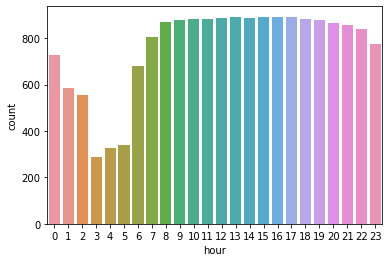

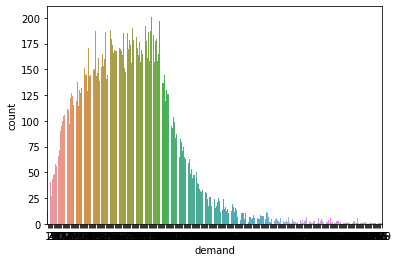

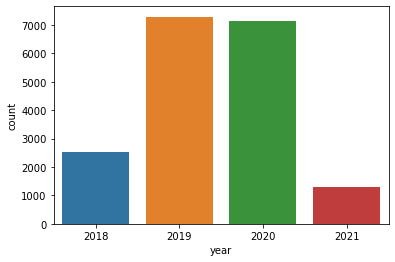

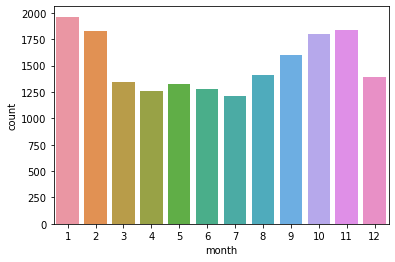

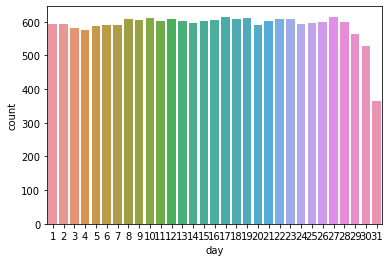

In [14]:
for i in df.columns:
    sns.countplot(df[i])
    plt.show()


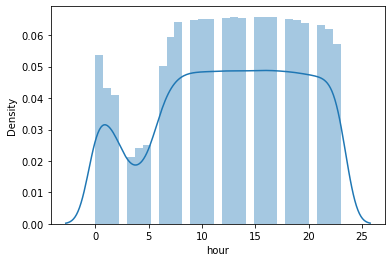

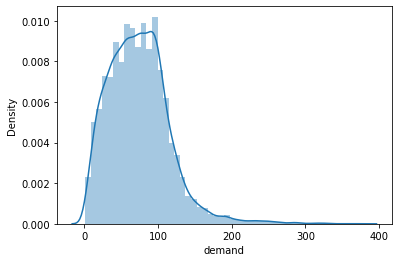

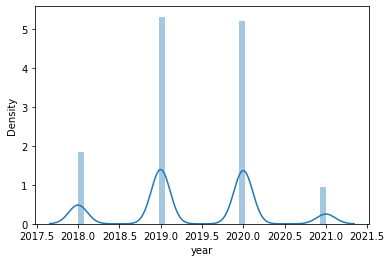

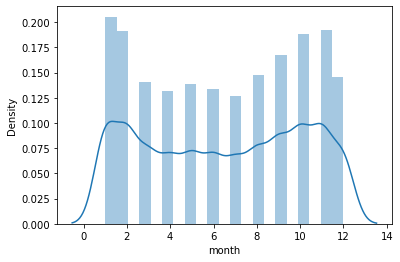

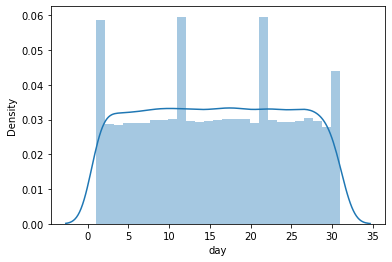

In [15]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

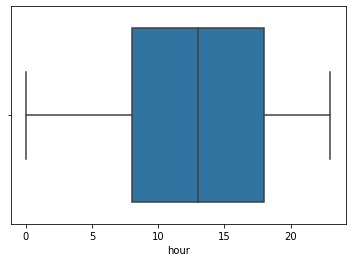

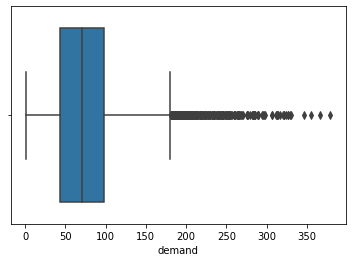

In [16]:
for i in df.select_dtypes('number'):
    sns.boxplot(df[i])
    plt.show()

## BI-Variate Analysis

<AxesSubplot:xlabel='hour', ylabel='demand'>

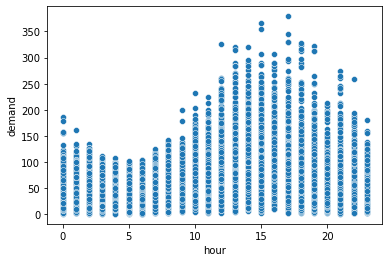

In [17]:
# check the relatioship between hour and demand
sns.scatterplot(df['hour'],df['demand'])

<AxesSubplot:xlabel='year', ylabel='demand'>

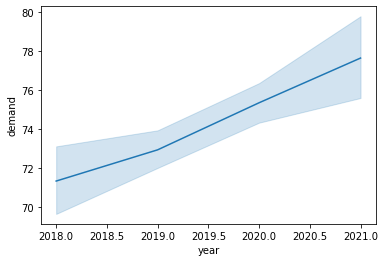

In [18]:
sns.lineplot(df['year'],df['demand'])

<AxesSubplot:xlabel='day', ylabel='hour'>

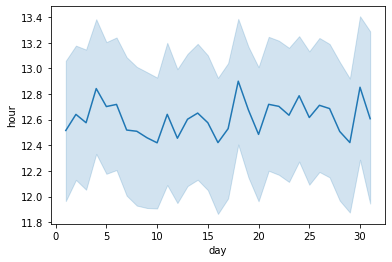

In [19]:
sns.lineplot(df['day'],df['hour'])

<AxesSubplot:xlabel='day', ylabel='demand'>

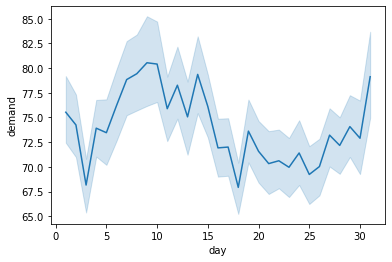

In [20]:
sns.lineplot(df['day'],df['demand'])

<AxesSubplot:xlabel='month', ylabel='hour'>

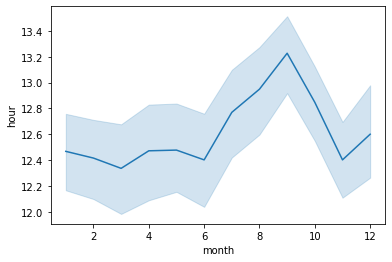

In [21]:
sns.lineplot(df['month'],df['hour'])

<AxesSubplot:xlabel='month', ylabel='demand'>

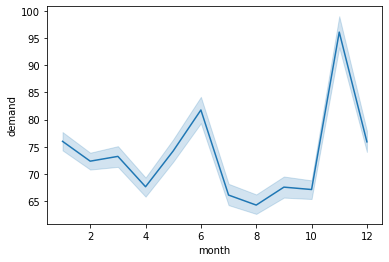

In [22]:
sns.lineplot(df['month'],df['demand'])

<AxesSubplot:>

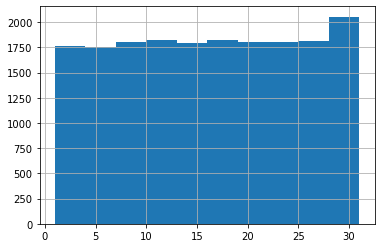

In [23]:
df['day'].hist()

In [24]:
df['demand'].describe()

count    18247.000000
mean        73.991451
std         41.678988
min          1.000000
25%         43.000000
50%         71.000000
75%         98.000000
max        379.000000
Name: demand, dtype: float64

In [25]:
df['demand'].quantile([0.50,0.75,0.90,0.95,0.99,0.999])

0.500     71.000
0.750     98.000
0.900    122.000
0.950    142.000
0.990    211.000
0.999    304.786
Name: demand, dtype: float64

In [26]:
df['hour'].describe()

count    18247.000000
mean        12.614731
std          6.544963
min          0.000000
25%          8.000000
50%         13.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

In [27]:
df1=df.copy()

In [28]:
df1_num=df1.select_dtypes('number')
df1_num.columns

Index(['hour', 'demand'], dtype='object')

In [29]:
df1_cat=df1.select_dtypes('object')
df1_cat.columns

Index(['year', 'month', 'day'], dtype='object')

In [30]:
encode=pd.get_dummies(df1_cat,drop_first=True)
encode.head()

,year_2019,year_2020,year_2021,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_con=pd.concat([df1_num,encode],axis=1)
df_con.head(2)

,hour,demand,year_2019,year_2020,year_2021,month_2,month_3,month_4,month_5,month_6,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,9,91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_con.columns

Index(['hour', 'demand', 'year_2019', 'year_2020', 'year_2021', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_2', 'day_3',
       'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10',
       'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17',
       'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 'day_24',
       'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [33]:
## Train-Test Split
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [34]:
df_target=df_con['demand']
df_feature=df_con.drop(['demand','year_2019','year_2020'],axis=1)
#df_featur=sm.add_constant(df_feature)

In [35]:
#df_featur=sm.add_constant(df_feature)
#xtrain,xtest,ytrain,ytest=train_test_split(df_feature,df_target,test_size=0.30,random_state=10)

In [36]:
#slr_model=sm.OLS(ytrain,xtrain).fit()
#print(slr_model.summary())

In [37]:
df2=df.copy()
df2.head(2)

,hour,demand,year,month,day
0,9,91,2018,8,18
1,10,21,2018,8,18


In [38]:
df2.dtypes

hour       int64
demand     int64
year      object
month     object
day       object
dtype: object

In [39]:
df2_cat=df2.select_dtypes('object')
df2_cat.columns

Index(['year', 'month', 'day'], dtype='object')

In [40]:
df2_num=df2.select_dtypes('number')
df2_num.columns

Index(['hour', 'demand'], dtype='object')

In [41]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
x=OrdinalEncoder()
df2_ord=x.fit_transform(df2_cat[['year','month','day']])
df2_ordinal=pd.DataFrame(df2_ord,columns=[['year','month','day']])
df2_ordinal.head()

,year,month,day
0,0.0,7.0,17.0
1,0.0,7.0,17.0
2,0.0,7.0,17.0
3,0.0,7.0,17.0
4,0.0,7.0,17.0


In [42]:
df2_ordinal['year'].value_counts()

(year,)
1.0        7286
2.0        7145
0.0        2511
3.0        1305
dtype: int64

In [43]:
df2_od=pd.concat([df2_num,df2_ordinal],axis=1)
df2_od.head(2)

,hour,demand,"(year,)","(month,)","(day,)"
0,9,91,0.0,7.0,17.0
1,10,21,0.0,7.0,17.0


In [44]:
df3=df.copy()
df3.head(3)

,hour,demand,year,month,day
0,9,91,2018,8,18
1,10,21,2018,8,18
2,13,23,2018,8,18


In [45]:
df3.dtypes

hour       int64
demand     int64
year      object
month     object
day       object
dtype: object

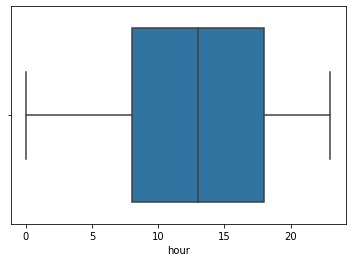

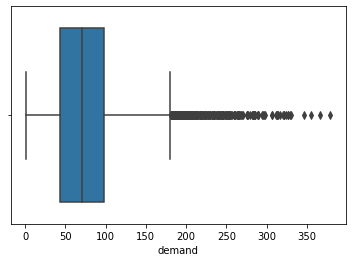

In [46]:
for i in df3.select_dtypes('number'):
    sns.boxplot(df[i])
    plt.show()

In [47]:
df3['demand'].describe()

count    18247.000000
mean        73.991451
std         41.678988
min          1.000000
25%         43.000000
50%         71.000000
75%         98.000000
max        379.000000
Name: demand, dtype: float64

In [48]:
#df3['demand'].quantile([0.90,0.95,0.99,0.999])

In [49]:
#df3['demand']=np.where(df3['demand']>304,304,df3['demand'])

In [50]:
#df3['demand'].describe()

In [51]:
def yr(x):
    if x<=190:
        return '2021'
    elif(x>190)&(x<=379):
        return '2022'
    else:
        return 'No year'

In [52]:
df3['year1']=df3['demand'].apply(yr)

In [53]:
df3['year1'].value_counts()

2021    17962
2022      285
Name: year1, dtype: int64

In [54]:
df3_cat=df3.select_dtypes('object')
df3_cat.columns

Index(['year', 'month', 'day', 'year1'], dtype='object')

In [55]:
df3_encode=pd.get_dummies(df3_cat[['year1','month','day']],drop_first=True)
df3_encode.head(2)

,year1_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df3_num=df3.select_dtypes('number')
df3_num.columns

Index(['hour', 'demand'], dtype='object')

In [57]:
df3_con=pd.concat([df3_num,df3_encode],axis=1)
df3_con.head(1)

,hour,demand,year1_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,9,91,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y=df3_con['demand']
x=df3_con.drop('demand',axis=1)

## Test Data

In [59]:
test=pd.read_csv('test_6QvDdzb.csv')
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [60]:
test.shape

(7650, 2)

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7650 entries, 0 to 7649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7650 non-null   object
 1   hour    7650 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.7+ KB


In [62]:
# convert the date column into date time 
test['date']=pd.to_datetime(test['date'])

In [63]:
test.dtypes

date    datetime64[ns]
hour             int64
dtype: object

In [64]:
test['year']=pd.DatetimeIndex(test['date']).year
test['month']=pd.DatetimeIndex(test['date']).month
test['day']=pd.DatetimeIndex(test['date']).day

In [65]:
test['year'].value_counts()

2021    5816
2022    1834
Name: year, dtype: int64

In [66]:
test['year']=test['year'].astype('object')
test['month']=test['month'].astype('object')
test['day']=test['day'].astype('object')

In [67]:
test.head()

,date,hour,year,month,day
0,2021-03-01,0,2021,3,1
1,2021-03-01,1,2021,3,1
2,2021-03-01,2,2021,3,1
3,2021-03-01,3,2021,3,1
4,2021-03-01,5,2021,3,1


In [68]:
test['year'].value_counts()

2021    5816
2022    1834
Name: year, dtype: int64

In [69]:
test['month'].value_counts()

3     1282
5      677
12     658
1      655
6      649
11     644
10     642
4      636
2      587
7      583
9      578
8       59
Name: month, dtype: int64

In [70]:
test['day'].value_counts()

17    263
16    262
10    258
20    257
22    257
8     256
21    256
14    255
11    255
25    255
2     255
28    255
26    254
19    253
5     253
23    253
27    253
3     253
6     252
18    252
24    252
12    252
1     251
9     250
7     250
4     249
15    248
13    247
29    217
30    203
31    124
Name: day, dtype: int64

<AxesSubplot:xlabel='date', ylabel='count'>

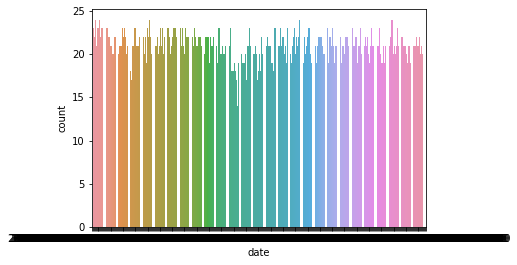

In [71]:
sns.countplot(test['date'])

In [72]:
tst_encode=pd.get_dummies(test[['year','month','day']],drop_first=True)
tst_encode.head(2)

,year_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
tst_df=pd.concat([test['hour'],tst_encode],axis=1)
tst_df.head(2)

,hour,year_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
test1=test.copy()
test1.head(2)

,date,hour,year,month,day
0,2021-03-01,0,2021,3,1
1,2021-03-01,1,2021,3,1


In [75]:
tst1_encode=pd.get_dummies(test1[['year','month','day']],drop_first=True)
tst1_encode.head(1)

,year_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
tst1_df=pd.concat([test1['hour'],tst1_encode],axis=1)
tst1_df.head(1)

,hour,year_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()
lr.fit(df_feature,df_target)

LinearRegression()

In [79]:
pred=lr.predict(tst_df)

In [80]:
pred

array([61.32694168, 62.39644985, 63.46595802, ..., 86.93245661,
       88.00196478, 89.07147295])

In [81]:
pred1=pd.DataFrame(pred)
sub=pd.read_csv('sample_4E0BhPN.csv')
d=pd.concat([sub[['date','hour']],pred1],axis=1)
d.columns=['date','hour','demand']
d.to_csv('sample_4E0BhPN.csv',index=False)

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

In [83]:
score=cross_val_score(estimator=LinearRegression(),X=df_feature,y=df_target,cv=5,scoring='r2')
score

array([ 5.85946606e-02,  3.41096261e-02,  8.67690805e-02,  3.40591698e-02,
       -2.37841137e+22])

### Stochastic Gradient

In [84]:
sr=SGDRegressor()
sr.fit(df_feature,df_target)

SGDRegressor()

In [85]:
pred_sr=sr.predict(tst_df)
pred_sr

array([58.94718222, 60.36637129, 61.78556036, ..., 94.1298827 ,
       95.54907177, 96.96826083])

In [86]:
pred2=pd.DataFrame(pred_sr)
sub1=pd.read_csv('sample_4E0BhPN.csv')
d_sr=pd.concat([sub1[['date','hour']],pred2],axis=1)
d_sr.columns=['date','hour','demand']
d_sr.to_csv('sample_4E0BhPN.csv',index=False)

In [87]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Lasso

In [88]:
lasso=Lasso(alpha=0.01,max_iter=100)
lasso.fit(df_feature,df_target)

Lasso(alpha=0.01, max_iter=100)

In [89]:
pred_ls=lasso.predict(tst_df)
pred_ls

array([60.17743148, 61.24580399, 62.31417649, ..., 87.29808096,
       88.36645347, 89.43482598])

In [90]:
pred3=pd.DataFrame(pred_ls)
sub2=pd.read_csv('sample_4E0BhPN.csv')
d_ls=pd.concat([sub2[['date','hour']],pred3],axis=1)
d_ls.columns=['date','hour','demand']
d_ls.to_csv('sample_4E0BhPN.csv',index=False)

## Ridge 

In [91]:
ridge=Ridge(alpha=10,max_iter=500)
ridge.fit(df_feature,df_target)

Ridge(alpha=10, max_iter=500)

In [92]:
rd_pred=ridge.predict(tst_df)
rd_pred

array([60.89252063, 61.9616688 , 63.03081697, ..., 86.93205033,
       88.0011985 , 89.07034667])

In [93]:
rid_pred=pd.DataFrame(rd_pred)
sub_rid=pd.read_csv('sample_4E0BhPN.csv')
d_rid=pd.concat([sub_rid[['date','hour']],rid_pred],axis=1)
d_rid.columns=['date','hour','demand']
d_rid.to_csv('sample_4E0BhPN.csv',index=False)

## With Outlier Treatment

In [94]:
x.head(1)

,hour,year1_2022,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
lr1=LinearRegression()
lr1.fit(x,y)

LinearRegression()

In [96]:
lr1_pred=lr1.predict(tst1_df)
lr1_pred

array([ 62.84012556,  63.74351785,  64.64691014, ..., 232.93337634,
       233.83676863, 234.74016092])

In [97]:
lr1=pd.DataFrame(lr1_pred)
sub_lr1=pd.read_csv('sample_4E0BhPN.csv')
d_lr1=pd.concat([sub_lr1[['date','hour']],lr1],axis=1)
d_lr1.columns=['date','hour','demand']
d_lr1.to_csv('sample_4E0BhPN.csv',index=False)

## Ensemble Technique

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [99]:
# Decision Tree
dt=DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [100]:
dt_pred=dt.predict(tst_df)
dt_pred

array([ 54.,  83.,  43., ..., 193., 193., 193.])

In [101]:
dtt_pred=pd.DataFrame(dt_pred)
sub_dtt=pd.read_csv('sample_4E0BhPN.csv')
d_dtt=pd.concat([sub_dtt[['date','hour']],dtt_pred],axis=1)
d_dtt.columns=['date','hour','demand']
d_dtt.to_csv('sample_4E0BhPN.csv',index=False)

In [111]:
# Randomforest bagging
rfm=RandomForestRegressor()
rfm.fit(x,y)

RandomForestRegressor()

In [112]:
rfm_pred=rfm.predict(tst_df)
rfm_pred

array([ 58.73609524,  76.96490476,  43.9205    , ..., 221.22      ,
       207.25      , 207.25      ])

In [113]:
rfmm_pred=pd.DataFrame(rfm_pred)
sub_rfm=pd.read_csv('sample_4E0BhPN.csv')
d_rfm=pd.concat([sub_rfm[['date','hour']],rfmm_pred],axis=1)
d_rfm.columns=['date','hour','demand']
d_rfm.to_csv('sample_4E0BhPN.csv',index=False)

In [102]:
## Ada boosting
ada=AdaBoostRegressor()
ada.fit(x,y)

AdaBoostRegressor()

In [103]:
ada_pred=ada.predict(tst_df)
ada_pred

array([ 56.22333722,  55.9104551 ,  55.9104551 , ..., 225.65560166,
       225.65560166, 225.65560166])

In [104]:
adab_pred=pd.DataFrame(ada_pred)
sub_ada=pd.read_csv('sample_4E0BhPN.csv')
d_ada=pd.concat([sub_ada[['date','hour']],adab_pred],axis=1)
d_ada.columns=['date','hour','demand']
d_ada.to_csv('sample_4E0BhPN.csv',index=False)

In [105]:
## GradientBoost
gdb=GradientBoostingRegressor()
gdb.fit(x,y)

GradientBoostingRegressor()

In [106]:
gdb_pred=gdb.predict(tst_df)
gdb_pred

array([ 57.57416584,  56.18903648,  56.18903648, ..., 213.19912141,
       210.98998706, 208.90579117])

In [107]:
gdbb_pred=pd.DataFrame(gdb_pred)
sub_gdb=pd.read_csv('sample_4E0BhPN.csv')
d_gdb=pd.concat([sub_gdb[['date','hour']],gdbb_pred],axis=1)
d_gdb.columns=['date','hour','demand']
d_gdb.to_csv('sample_4E0BhPN.csv',index=False)

In [108]:
# Xgboostibng 
xgb=XGBRegressor()
xgb.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [109]:
xgb_pred=xgb.predict(tst_df)
xgb_pred

array([ 61.16312,  54.48367,  54.92483, ..., 219.56277, 208.98788,
       211.50998], dtype=float32)

In [110]:
xgbb_pred=pd.DataFrame(xgb_pred)
sub_xgb=pd.read_csv('sample_4E0BhPN.csv')
d_xgb=pd.concat([sub_xgb[['date','hour']],xgbb_pred],axis=1)
d_xgb.columns=['date','hour','demand']
d_xgb.to_csv('sample_4E0BhPN.csv',index=False)

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
knn=KNeighborsRegressor(n_neighbors=7,metric='euclidean')
knn.fit(x,y)

KNeighborsRegressor(metric='euclidean', n_neighbors=7)

In [116]:
knn_pred=knn.predict(tst_df)
knn_pred

array([73.14285714, 64.28571429, 48.14285714, ..., 78.71428571,
       59.85714286, 62.28571429])

In [117]:
knnn_pred=pd.DataFrame(knn_pred)
sub_knn=pd.read_csv('sample_4E0BhPN.csv')
d_knn=pd.concat([sub_knn[['date','hour']],knnn_pred],axis=1)
d_knn.columns=['date','hour','demand']
d_knn.to_csv('sample_4E0BhPN.csv',index=False)

In [ ]:
# Grid search Cv
tunning=